In [1]:
from pylab import *
%matplotlib inline

import data
import numpy as np


/home/alex/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [17]:
patient_ids = data.luna16_get_patient_ids()
pid = patient_ids[0]
image = data.luna16_get_image(pid)

In [18]:
image.shape 

(231, 360, 360)

In [19]:
import sklearn.neighbors

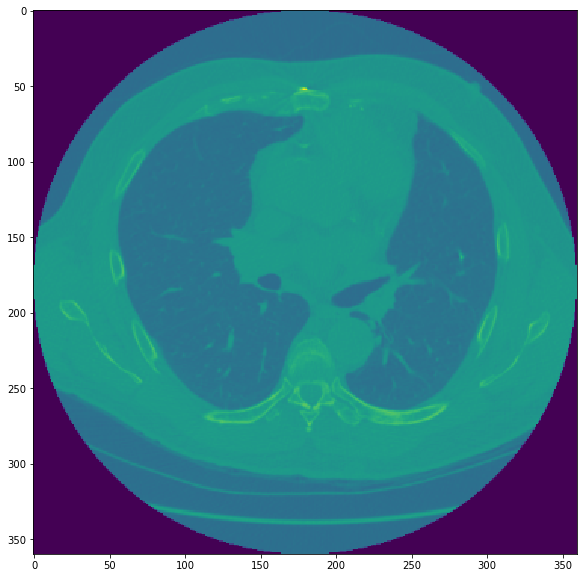

In [20]:
figure(figsize=(10,10))
imshow(image[110])

In [22]:
patches = []
borders = []

def get_border(p):
    border = np.concatenate((p[:2,:].ravel(), p[-2:,:].ravel(), p[2:-2,:2].ravel(), p[2:-2,-2:].ravel()))
    return border

for i in range(0,360-16,16):
    for j in range(0,360-16,16):
        p = image[115,i:i+16,j:j+16]
        #print(p.shape)
        border = get_border(p)
        #print(border.shape)
        patches.append(p)
        borders.append(border)

In [23]:
lshf = sklearn.neighbors.LSHForest(random_state=42)
lshf.fit(borders)


LSHForest(min_hash_match=4, n_candidates=50, n_estimators=10, n_neighbors=5,
     radius=1.0, radius_cutoff_ratio=0.9, random_state=42)

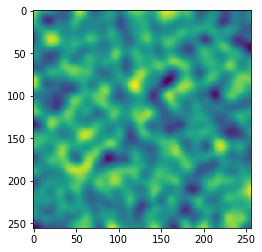

In [33]:
import scipy.ndimage.filters
noise_image = np.random.normal(size=(256,256))
noise_image = scipy.ndimage.filters.gaussian_filter(noise_image, sigma=6)
imshow(noise_image)

In [38]:
import random

In [59]:
output_image = noise_image.copy() # np.zeros((256,256))

for i in range(0,output_image.shape[0]-16,8):
    for j in range(0,output_image.shape[1]-16,8):
        p = noise_image[i:i+16,j:j+16]
        #p = output_image[i:i+16,j:j+16]
        distances, indices = lshf.kneighbors([get_border(p)], n_neighbors=2)
        output_image[i:i+16,j:j+16] = patches[random.choice(indices[0])]

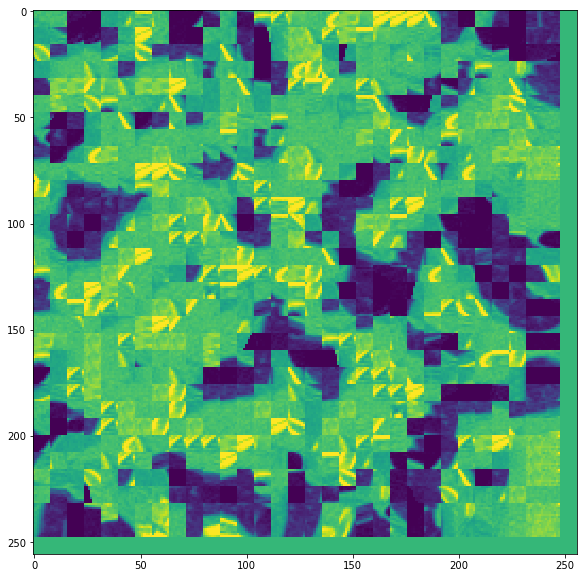

In [60]:
figure(figsize=(10,10))
imshow(output_image, vmin=-1000, vmax=500)